In [1]:
## author: Wei-Ran Li (HKU, weiranli@hku.hk)

import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

## import functions for calculating primary olivine crystallisation temperatures (Tprim)
import ol_t_cal_1eqn as cal0
import ol_t_cal_2eqn as cal2
import ol_t_cal_2eqn_varyliq as cal3
import ol_t_cal_1eqn_varyliq as cal4

In [2]:
P = 1       # in GPa
H2O= 0      # in wt%
alk= 5      # in wt%
SiO2= 48    # in wt%
kd = 0.3    # Kd for Fe-Mg between olivine-liquid

In [3]:
# Forsterite (Fo) content and crystallisation temperature (Tcrys) of the analysed olivine
Tcrys0 = 1217   # degree celsius
fo0 = 85.3      # mol%

In [4]:
## calculate Tprim using different functions
for cal_ in [cal0,cal2,cal3,cal4]:
    Tcrys_fo_fix = cal_.cal(fo0,Tcrys0,kd=kd,P00=P,c_sio2=SiO2,c_alkali=alk,c_h2o=H2O)
    Tcrys_fo_fix = Tcrys_fo_fix.sort_values(by="Fo")
    Tcrys_fo_fix = Tcrys_fo_fix.reset_index(drop=True)
    ff = interp1d(Tcrys_fo_fix["Fo"],Tcrys_fo_fix["Tcrys"])
    tt = ff(91)
    print(tt) # Tprim, degree celsius

1430.670711687582
1435.2504472898363
1414.7454025606885
1411.6454025606913


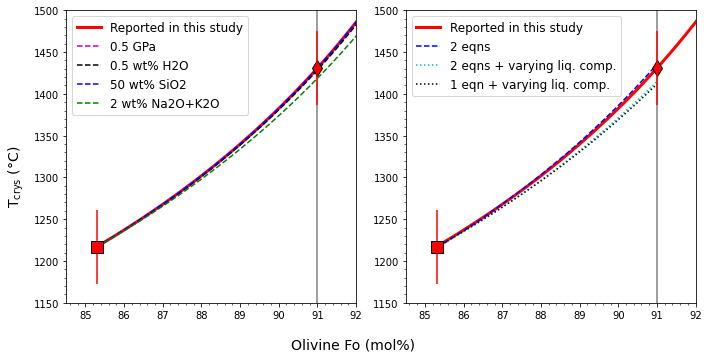

In [5]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(1,2,figsize=(10,5))

#### first panel ####
## use 1 equation
Tcrys_fo_fix = cal0.cal(fo0,Tcrys0,kd=kd,P00=1,c_sio2=SiO2,c_alkali=alk,c_h2o=H2O)
Tcrys_fo_fix = Tcrys_fo_fix.sort_values(by="Fo")
Tcrys_fo_fix = Tcrys_fo_fix.reset_index(drop=True)
axes[0].plot(Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Fo"],Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Tcrys"],'r-',lw=3,zorder=0,label='Reported in this study')
axes[1].plot(Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Fo"],Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Tcrys"],'r-',lw=3,zorder=0,label='Reported in this study')

ff = interp1d(Tcrys_fo_fix["Fo"],Tcrys_fo_fix["Tcrys"])
t0 = ff(91)

## use 1 equation, change pressure
Tcrys_fo_fix = cal0.cal(fo0,Tcrys0,kd=kd,P00=0.5,c_sio2=50,c_alkali=alk,c_h2o=H2O)
Tcrys_fo_fix = Tcrys_fo_fix.sort_values(by="Fo")
Tcrys_fo_fix = Tcrys_fo_fix.reset_index(drop=True)
axes[0].plot(Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Fo"],Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Tcrys"],'m--',zorder=0,label='0.5 GPa')

## use 1 equation, change water
Tcrys_fo_fix = cal0.cal(fo0,Tcrys0,kd=kd,P00=1,c_sio2=SiO2,c_alkali=alk,c_h2o=0.5)
Tcrys_fo_fix = Tcrys_fo_fix.sort_values(by="Fo")
Tcrys_fo_fix = Tcrys_fo_fix.reset_index(drop=True)
axes[0].plot(Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Fo"],Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Tcrys"],'k--',zorder=0,label='0.5 wt% H2O')

## use 1 equation, change sio2
Tcrys_fo_fix = cal0.cal(fo0,Tcrys0,kd=kd,P00=1,c_sio2=50,c_alkali=alk,c_h2o=H2O)
Tcrys_fo_fix = Tcrys_fo_fix.sort_values(by="Fo")
Tcrys_fo_fix = Tcrys_fo_fix.reset_index(drop=True)
axes[0].plot(Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Fo"],Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Tcrys"],'b--',zorder=0,label='50 wt% SiO2')

## use 1 equation, change NA+K
Tcrys_fo_fix = cal0.cal(fo0,Tcrys0,kd=kd,P00=1,c_sio2=SiO2,c_alkali=2,c_h2o=H2O)
Tcrys_fo_fix = Tcrys_fo_fix.sort_values(by="Fo")
Tcrys_fo_fix = Tcrys_fo_fix.reset_index(drop=True)
axes[0].plot(Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Fo"],Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Tcrys"],'g--',zorder=0,label='2 wt% Na2O+K2O')


#### second panel ####
# use 2 equations
Tcrys_fo_fix = cal2.cal(fo0,Tcrys0,kd=kd,c_sio2 = SiO2,c_alkali  = alk,c_h2o=H2O)
Tcrys_fo_fix = Tcrys_fo_fix.sort_values(by="Fo")
Tcrys_fo_fix = Tcrys_fo_fix.reset_index(drop=True)
axes[1].plot(Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Fo"],Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Tcrys"],'b--',zorder=0,label='2 eqns')
t2 = Tcrys_fo_fix["Tcrys"].max()

# use 2 equations and vary liquid composition
Tcrys_fo_fix = cal3.cal(fo0,Tcrys0,kd=kd,c_sio2 = SiO2,c_alkali  = alk,c_h2o=H2O)
Tcrys_fo_fix = Tcrys_fo_fix.sort_values(by="Fo")
Tcrys_fo_fix = Tcrys_fo_fix.reset_index(drop=True)
plt.plot(Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Fo"],Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Tcrys"],'c:',zorder=0,label='2 eqns + varying liq. comp.')
t3 = Tcrys_fo_fix["Tcrys"].max()

# use 1 equation and vary liquid composition
Tcrys_fo_fix = cal4.cal(fo0,Tcrys0,kd=kd,c_sio2 = SiO2,c_alkali  = alk,c_h2o=H2O)
Tcrys_fo_fix = Tcrys_fo_fix.sort_values(by="Fo")
Tcrys_fo_fix = Tcrys_fo_fix.reset_index(drop=True)
axes[1].plot(Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Fo"],Tcrys_fo_fix[Tcrys_fo_fix["Fo"]>=fo0]["Tcrys"],'k:',zorder=0,label='1 eqn + varying liq. comp.')
t4 = Tcrys_fo_fix["Tcrys"].max()

for ii in range(2):
    axes[ii].plot(fo0,Tcrys0,'rs',mec='k',ms=12)
    axes[ii].errorbar(fo0,Tcrys0,yerr=44,fmt='.',color='r',zorder=0)
    axes[ii].plot(91,t0,'rd',mec='k',ms=12)
    axes[ii].errorbar(91,t0,yerr=44,fmt='.',color='r',zorder=10)
    axes[ii].axvline(x=91,color='grey',ls='-',zorder=0)
    axes[ii].legend(fontsize=12)
    axes[ii].set_xlim([84.5,92])
    axes[ii].set_ylim([1150,1500])
    axes[ii].minorticks_on()

fig.supxlabel("Olivine Fo (mol%)",fontsize=14)
fig.supylabel("$\sf{T_{crys}}$ (°C)",fontsize=14)
fig.tight_layout()

plt.show()